#  Supervised Learning in Machine Learning 
Supervised Learning is a type of machine learning where a model is trained on labeled data to learn the relationship between input features and known output targets for future predictions.
#  Classification vs Regression in Machine Learning

Both **Classification** and **Regression** are **Supervised Learning** techniques — they use labeled data to train a model, but they differ in the type of output they predict.

---

##  1. Classification

###  Definition
Classification predicts **categorical (discrete)** outcomes — meaning the result belongs to a specific **class or category**.

###  Goal
Assign input data to predefined labels (e.g., *Yes/No*, *Pass/Fail*, *Spam/Not Spam*, *Disease/No Disease*).

---

###  Example Dataset: *Student Exam Eligibility*

| Attendance (%) | Assignments_Completed | Average_Score | Eligible_For_Exam |
|----------------|----------------------|----------------|-------------------|
| 92             | 8                    | 78             | Yes               |
| 65             | 5                    | 55             | No                |
| 88             | 7                    | 74             | Yes               |
| 70             | 6                    | 60             | No                |
| 96             | 10                   | 85             | Yes               |

**Target (Label):** `Eligible_For_Exam` → categorical (`Yes` or `No`)

---

###  Common Algorithms
- Logistic Regression  
- Decision Tree Classifier  
- Random Forest Classifier  
- Support Vector Machine (SVM)  
- K-Nearest Neighbors (KNN)  
- Naive Bayes  

---

###  Example Prediction
> Given a student with 85% attendance and 8 assignments done,  
> the model predicts **“Yes” (Eligible)**.

---

##  2. Regression

###  Definition
Regression predicts **continuous (numeric)** outcomes — meaning the result is a real number rather than a category.

###  Goal
Estimate a **quantity or value** based on input features.

---

###  Example Dataset: *Student Final Score Prediction*

| Study_Hours | Attendance (%) | Assignments_Completed | Final_Score |
|--------------|----------------|----------------------|--------------|
| 4            | 80             | 7                    | 65.4         |
| 6            | 90             | 9                    | 82.1         |
| 2            | 60             | 4                    | 48.2         |
| 8            | 95             | 10                   | 91.7         |
| 3            | 70             | 5                    | 55.6         |

**Target (Label):** `Final_Score` → continuous numeric value

---

###  Common Algorithms
- Linear Regression  
- Decision Tree Regressor  
- Random Forest Regressor  
- Support Vector Regressor (SVR)  
- Gradient Boosting Regressor  

---

###  Example Prediction
> Given a student with 7 study hours, 90% attendance, and 8 assignments done,  
> the model predicts a **Final_Score ≈ 85.3**.

---

##  Summary Comparison

| Feature | Classification | Regression |
|----------|----------------|-------------|
| **Output Type** | Categorical (labels/classes) | Continuous (real values) |
| **Example Target** | Eligible / Not Eligible | Final Exam Score |
| **Goal** | Assign categories | Predict numeric values |
| **Evaluation Metrics** | Accuracy, Precision, Recall, F1-score | MAE, MSE, RMSE, R² |
| **Example Algorithms** | Logistic Regression, Random Forest Classifier | Linear Regression, Random Forest Regressor |

---

###  Key Takeaway

- Use **Classification** when predicting a **label or category**.  
- Use **Regression** when predicting a **numeric or continuous value**.  


#  Scenario: Student Exam Eligibility System

In a university or college, every student must meet certain conditions to be **eligible to sit for the final examination**. The academic board monitors attendance, assignment submissions, discipline, and performance throughout the semester.

The **goal of this dataset** is to determine whether a student is eligible to sit for an exam based on key attributes such as:

- **Attendance (%):** Measures class participation. Students with attendance below 75% are considered ineligible.
- **Assignments Completed:** Number of submitted assignments during the term. A minimum of 6 assignments is required.
- **Disciplinary Record:** Indicates whether a student has any recorded misconduct (`Yes` or `No`).
- **Average Score:** Average of continuous assessment marks.

Using these features, we label each student as either:

- `"Yes"` → **Eligible** to sit for exam  
- `"No"` → **Not eligible**

This dataset can be used to:

- Train a **classification model** (e.g., Random Forest, Decision Tree, or Logistic Regression) to predict eligibility.
- Test preprocessing methods like **encoding**, **scaling**, and **train-test splitting**.
- Evaluate performance with metrics such as **accuracy**, **confusion matrix**, and **classification report**.


#  Student Exam Eligibility Prediction
This notebook demonstrates preprocessing and model building to predict if a student is eligible to sit for an exam.

In [301]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('student_exam_eligibility_dataset.csv')
df.head()

,Student_ID,Name,Attendance(%),Assignments_Completed,Disciplinary_Record,Average_Score,Eligible_For_Exam
0,1001,Student_1001,78,6,No,77,Yes
1,1002,Student_1002,91,2,No,92,No
2,1003,Student_1003,68,5,No,45,No
3,1004,Student_1004,54,1,No,97,No
4,1005,Student_1005,82,9,Yes,83,No


In [302]:
df.tail(10)

,Student_ID,Name,Attendance(%),Assignments_Completed,Disciplinary_Record,Average_Score,Eligible_For_Exam
190,1191,Student_1191,76,6,No,73,Yes
191,1192,Student_1192,62,1,No,91,No
192,1193,Student_1193,78,9,No,96,Yes
193,1194,Student_1194,84,1,No,77,No
194,1195,Student_1195,54,9,No,72,No
195,1196,Student_1196,82,0,No,63,No
196,1197,Student_1197,68,7,Yes,54,No
197,1198,Student_1198,75,0,No,99,No
198,1199,Student_1199,52,8,No,69,No
199,1200,Student_1200,71,5,Yes,94,No


##  Step 1: Check for Missing Values & Data Types

In [303]:
print(df.info())
print("\nMissing values per column:\n", df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Student_ID             200 non-null    int64 
 1   Name                   200 non-null    object
 2   Attendance(%)          200 non-null    int64 
 3   Assignments_Completed  200 non-null    int64 
 4   Disciplinary_Record    200 non-null    object
 5   Average_Score          200 non-null    int64 
 6   Eligible_For_Exam      200 non-null    object
dtypes: int64(4), object(3)
memory usage: 11.1+ KB
None

Missing values per column:
 Student_ID               0
Name                     0
Attendance(%)            0
Assignments_Completed    0
Disciplinary_Record      0
Average_Score            0
Eligible_For_Exam        0
dtype: int64


# Mean, Median, and Mode Imputation

When a dataset contains **missing values**, we can handle them using **imputation** — replacing missing entries with estimated values.  
The three most common imputation methods are **Mean**, **Median**, and **Mode**, each suited for different types of data.

---

## 1 Mean Imputation

### Definition
Replaces missing values with the **mean (average)** of the available data.

### When to Use
- Suitable for **numerical data** (e.g., marks, height, income).
- Works best when the data is **normally distributed** (no large outliers).

### Example

| Student | Math_Score |
|----------|-------------|
| A | 80 |
| B | 90 |
| C | *NaN* |
| D | 70 |

**Mean = (80 + 90 + 70) / 3 = 80**

Missing value replaced with **80**

```python
df['Math_Score'].fillna(df['Math_Score'].mean(), inplace=True)


## 2. Median Imputation

### Definition
Replaces missing values with the **median (middle value)** of the available data.

---

### When to Use
- Suitable for **numerical data** that is **skewed** (not symmetric).  
- Best when your data contains **outliers**, since the median is not affected by extreme values.

---

###  Example

| Salary ($) |
|-------------|
| 500 |
| 520 |
| *NaN* |
| 10,000 |

**Explanation:**  
The **mean** would be distorted by the large outlier (**10,000**),  
so we replace the missing value with the **median**, which better represents the central tendency.

```python
df['Salary'].fillna(df['Salary'].median(), inplace=True)


## 3. Mode Imputation

###  Definition
Replaces missing values with the **most frequent (mode)** value in the column.

---

###  When to Use
- Best for **categorical data** (e.g., gender, city, department).  
- Useful when one category is clearly **dominant**.

---

### Example

| Student | Gender |
|----------|---------|
| A | Male |
| B | *NaN* |
| C | Male |
| D | Female |

**Explanation:**  
The **mode** (most frequent value) is **'Male'**,  
so the missing value for student **B** is replaced with **'Male'**.

```python
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

###  Summary

| Expression | Meaning |
|-------------|----------|
| `mode()[0]` | Get the most frequent value in the column |
| `inplace=True` | Update the DataFrame directly, without creating a new one |



<h1>Detecting outliers by IQR</h1>

In [304]:
# 1️ Select numeric columns
# Numeric columns → median
num_cols = df.select_dtypes(include=np.number).columns
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))
# Calculate IQR for numeric columns
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers (True/False mask)
outlier_mask = ((df[num_cols] < lower_bound) | (df[num_cols] > upper_bound))

# Count total outlier values
outliers = outlier_mask.sum().sum()
print(f"Detected {outliers} outlier values (IQR Method)\n")

# Show the rows that contain any outliers
outlier_rows = df[outlier_mask.any(axis=1)]
print(f"Number of rows containing at least one outlier: {len(outlier_rows)}\n")

# Display the actual outlier rows
display(outlier_rows)



Detected 0 outlier values (IQR Method)

Number of rows containing at least one outlier: 0



,Student_ID,Name,Attendance(%),Assignments_Completed,Disciplinary_Record,Average_Score,Eligible_For_Exam


###  Plotting Records Using a Box Plot
This box plot helps detect any **outliers**, which will appear as **dots (balls)** outside the whiskers of each plot.


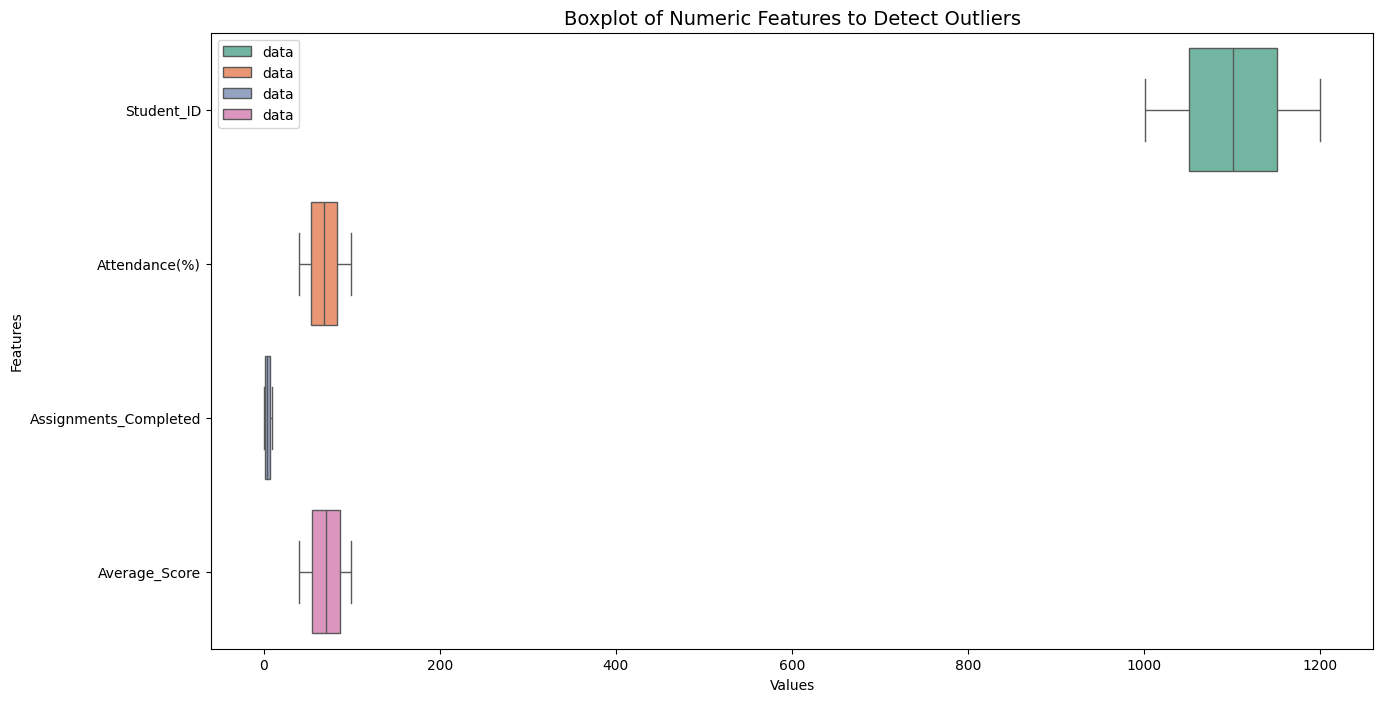

In [305]:
# check outliers
# Select only numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
# numeric_cols
# Set up boxplot visualization
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_cols], orient='h', palette='Set2', label="data")
plt.title("Boxplot of Numeric Features to Detect Outliers", fontsize=14)
plt.xlabel("Values")
plt.ylabel("Features")
plt.legend()
plt.show()



In [306]:
df.head()

,Student_ID,Name,Attendance(%),Assignments_Completed,Disciplinary_Record,Average_Score,Eligible_For_Exam
0,1001,Student_1001,78,6,No,77,Yes
1,1002,Student_1002,91,2,No,92,No
2,1003,Student_1003,68,5,No,45,No
3,1004,Student_1004,54,1,No,97,No
4,1005,Student_1005,82,9,Yes,83,No


##  Step 2: Handle Categorical Columns (Encoding)

In [307]:
# # Encode categorical columns
label_encoder = LabelEncoder()
df['Disciplinary_Record'] = label_encoder.fit_transform(df['Disciplinary_Record'])
df['Eligible_For_Exam'] = label_encoder.fit_transform(df['Eligible_For_Exam'])
df.head()

,Student_ID,Name,Attendance(%),Assignments_Completed,Disciplinary_Record,Average_Score,Eligible_For_Exam
0,1001,Student_1001,78,6,0,77,1
1,1002,Student_1002,91,2,0,92,0
2,1003,Student_1003,68,5,0,45,0
3,1004,Student_1004,54,1,0,97,0
4,1005,Student_1005,82,9,1,83,0


##  Step 3: Feature Splitting

In [308]:
df.columns

Index(['Student_ID', 'Name', 'Attendance(%)', 'Assignments_Completed',
       'Disciplinary_Record', 'Average_Score', 'Eligible_For_Exam'],
      dtype='object')

In [309]:
# Select features and target
X = df.drop(['Eligible_For_Exam','Student_ID','Name'], axis=1)
y = df['Eligible_For_Exam']



In [310]:
len(df)

200

In [311]:
df.shape

(200, 7)

##  Step 4: Train-Test Split

In [312]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print('Training set:', X_train.shape, '\tTesting set:', X_test.shape)

Training set: (160, 4) 	Testing set: (40, 4)


In [313]:
X_train.head()

,Attendance(%),Assignments_Completed,Disciplinary_Record,Average_Score
78,75,2,0,44
21,41,5,0,57
184,78,9,0,73
99,47,3,1,60
20,92,6,0,96


In [314]:
# Apply scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Scaled feature sample:\n', X_train_scaled)
print('Scaled feature sample:\n', X_test_scaled)

Scaled feature sample:
 [[ 0.33493683 -0.69407172 -0.42008403 -1.51681928]
 [-1.67838512  0.35358371 -0.42008403 -0.77586482]
 [ 0.51258289  1.75045761 -0.42008403  0.13607914]
 [-1.32309301 -0.34485324  2.38047614 -0.60487533]
 [ 1.34159781  0.70280218 -0.42008403  1.44699857]
 [ 0.39415218  0.00436523 -0.42008403  0.25007213]
 [ 0.21650613 -1.04329019 -0.42008403  1.27600908]
 [-1.44152371  1.40123913  2.38047614  1.39000207]
 [ 0.80865964 -1.39250867 -0.42008403  1.04802309]
 [-1.50073906  0.00436523 -0.42008403  0.8770336 ]
 [ 0.9863057   0.35358371 -0.42008403 -0.20589985]
 [-1.61916976  1.40123913 -0.42008403 -0.71886832]
 [ 1.34159781 -1.39250867 -0.42008403  1.61798806]
 [-1.73760047  1.05202066  2.38047614 -1.63081228]
 [-1.32309301 -1.04329019 -0.42008403 -1.2318368 ]
 [ 0.69022894  1.05202066 -0.42008403  1.04802309]
 [-0.31643203  0.70280218 -0.42008403  0.30706863]
 [ 0.33493683  1.40123913 -0.42008403  0.30706863]
 [ 0.51258289  0.70280218 -0.42008403  0.36406513]
 [-0.49

##  Step 5: Train Model (Random Forest Classifier)

In [315]:
model = RandomForestClassifier(n_estimators=100, random_state=42) #model initialization
model.fit(X_train_scaled, y_train) #model training

# Make predictions

y_pred = model.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f'Random Forest Model Accuracy: {acc} == {acc*100:.2f}%')

Random Forest Model Accuracy: 1.0 == 100.00%


##  Step 5.1: Train Model (Logistic Regression Classifier)

In [316]:
model_logistic = LogisticRegression(random_state=42)
model_logistic.fit(X_train_scaled, y_train)

y_pred = model_logistic.predict(X_test_scaled)
acc = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Model Accuracy: {acc} == {acc*100:.2f}%')

Logistic Regression Model Accuracy: 1.0 == 100.00%


<h1>Display Actual vs Predicted Results</h1>

In [317]:
# Combine actual and predicted values into a table
results_df = pd.DataFrame({
    'Actual (y_test)': y_test.values,
    'Predicted (y_pred)': y_pred
})

# Reset index for readability
results_df.reset_index(drop=True, inplace=True)

# Display first 15 rows
print(f" Model Accuracy: {acc*100:.2f}%")
results_df.head(15)


 Model Accuracy: 100.00%


,Actual (y_test),Predicted (y_pred)
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,0,0


##  Step 6: Evaluation

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00         5

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



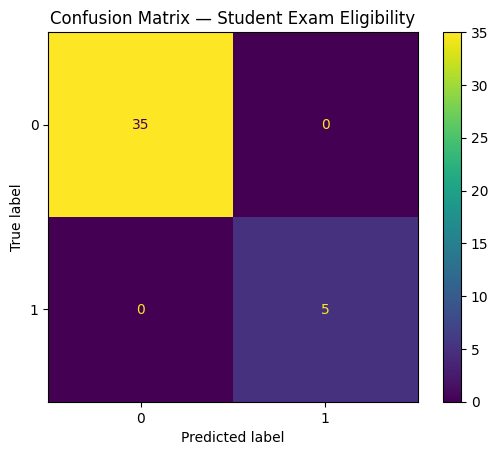

In [318]:
print('Classification Report:\n', classification_report(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Confusion Matrix — Student Exam Eligibility')
plt.show()

##  Step 7: Save the Preprocessed Data

In [319]:
df.to_csv('student_exam_eligibility_preprocessed.csv', index=False)
print('Preprocessed dataset saved successfully!')

Preprocessed dataset saved successfully!
